# Explority Data Analysis with python
### The process of EDA is called Data Cleaning
### Data cleaning involves 
- missing values
- incorrect headers
- incorrect format
- anomalies/outliers

In [14]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as p
%matplotlib inline

In [8]:
titanic=pd.read_csv('Titanic_train.csv')

In [9]:
titanic.head() # to find top rows default we will get 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.tail()  # to find last rows default we will last 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
# See all the data types are correct or not sometime age/sex/... will be of int type then we need to convert

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Missing Data
## Check out missing data in visualization format

In [17]:
# TO know number of rows and colunms

titanic.shape

# there are rows=891 and cols=12

(891, 12)

In [15]:
# we can check missing data in numerical format as below

titanic.count()

# from the below data we can say that overall there are 891 rows 
# but for AGE and CABIN there are 714 and 204 values respectively which are less than 891 
# means some values are missing

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [20]:
# other way to know missing values 

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# know missing values through True/False

titanic.isnull().head()

# if the value is true then it is null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


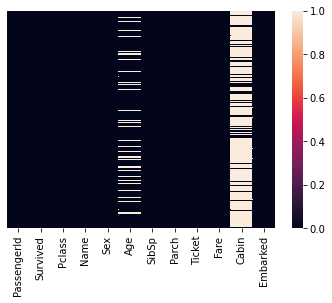

In [30]:
# know missing values in pictorial format

s.heatmap(titanic.isnull(),yticklabels=False)

# yticklabels=False means on y-axis there are no values printed else it will display numbers from 0 to 890
# in below graph we can see that in AGE and CABIN there are null values
# In that Age has less null values that cabin 
# cabin column is better to drop as it has more null values 
# if we have more null values we need to do feature engineering(In future classes)

##### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

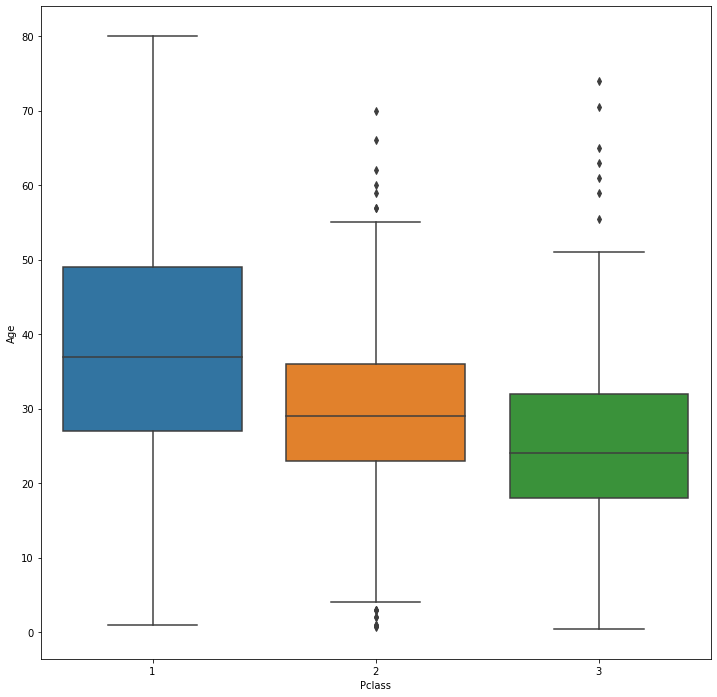

In [36]:
# First we will replace null values of Age with the average (Percentile)
# this is possible through box plot

p.figure(figsize=(12,12),clear=True)
s.boxplot(x='Pclass',y='Age',data=titanic)

In [40]:
'''In the box plot we can see in
Pclass=1---the percentile(of middle value) is about 37
Pclass=2---the percentile(of middle value)is about 29
Pclass=3---the percentile(of middle value)is about 24
now we will replace values in place of NULL accordingly'''

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [45]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

#(here AGE and Pclass are columns so we should give axis=1)

In [ ]:
# Now drop cabin column as it has more null values

titanic.drop('Cabin',axis=1,inplace=True)

#here inplace=True means the data is modified in place which means it will return nothing and dataframe is updated

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


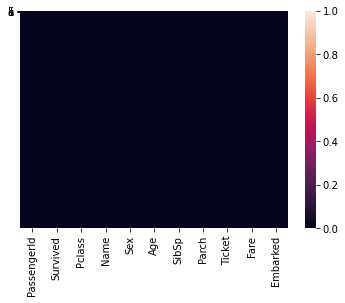

In [58]:
s.heatmap(titanic.isnull(),yticklabels='False')

#null values for Age is replaced
#cabin column is droped 

In [61]:
# Our aim is to convert catogerical values to numerical values 
# Here there are 2 catogerical features (sex and embarked)
# So we need to get dummies(in numerical format) for these 2 features
# In Titanic dataset 'Embarked' means passenger boarding point (there are 3 boarding points(Q/S/C))
# for this we are using get_dummies(provided by Pandas)--Convert categorical variable into dummy/indicator variables.

pd.get_dummies(titanic['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [62]:
# here we can remove C/Q/S why because if Q AND S are 0 obviously C value will be 1 
# means in that particualr row 'Embarked' value is C
# so we can remove one column in q/c/s

pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [65]:
# Apply same for Sex column

pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [67]:
# Here we can remove female/male 

pd.get_dummies(titanic['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
# Now we can store the above 2 dummies in another variable and drop SEX and EMBARKED columns

male=pd.get_dummies(titanic['Sex'],drop_first=True)
Embark=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [ ]:
# Now drop 2 features

titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [73]:
# remove unused columns as per our knowledge 

titanic.drop(['Name','Ticket'],axis=1,inplace=True)

In [74]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [77]:
# Now concat sex and embark dummies

titanic=pd.concat([titanic,male,Embark],axis=1)

In [78]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [79]:
# Now all the values are Numerical and also the data is cleaned 